# SCRUBBING, CLEANING AND DATA ENGINEERING
 
## Objectives

The objective of this notebook will be to try to achieve the following main bullet points:

* Cast columns to appropriate data types
* Identify and deal with null values appropriately
* Remove unnecessary columns
* Perform data engineer when possible and necessary

I will start by loading what I consider are the necessary libraries:

## Libraries

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import folium
from folium.plugins import HeatMap

%matplotlib inline
sns.set_style('darkgrid')

In [80]:
# These two lines are to ingnore warnings that normally are within pink boxes

import warnings
warnings.filterwarnings('ignore')

The following is a short description of the libraries used:

<u>Pandas</u>: software library written for Python for data manipulation and analysis. In particular it offers data structures and operations for manipulating numerical tables and time series. 

<u>Numpy</u>: Library that provides a high-performance multidimensional array and basic tools to compute with and manipulate these arrays. Scipy is build on this, and provides a large number of functions that operate on numpy arrays and are useful for different types of scientific and engineering applications

<u>Matplotplib</u>: This is a comprehensive library for creating static, animated, and interactive visualization in Python. Matplotlib produces publication-quality figures in a variety of hardcopy formats and interactive environments across platforms

<u>Seaborn</u>: Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics

<u>Folium</u>: Library that makes it easy to visualize data that's been manipulated in Python on an interactive leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing rich vector/raster/HTML visualizations as markers on the map

Furthermore, the "%matplotlib inline" function has been activated which basically renders the figures in a notebook (instead of displaying a dump of the figure object), and the style of Seaborn plots has been preset to "darkgrid" (sns.set_style('darkgrid'))

With the key libraries loaded, the next step is to load the data to use as a dataframe (df). In this case the file is the "ks_house_data.csv". Once loaded a .head() and .tail() will be ran for a quick view of the first and last 5 rows of the dataframe

## Data Loading and Description 

In [81]:
df = pd.read_csv('kc_house_data.csv')
pd.set_option('display.max_columns', 500) # Allows to display up to 500 columns
df.head().append(df.tail())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,3,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


Now we will proceed to verify the data type for each column with a basic .info():

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [83]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Data Cleaning and Engineering

With the .info() display, we can see the shape of the dataframe  (21 columns x  21597 rows). We can also see that there are three columns that have missing values: waterfront, yr_renovated and view, and also that there are two columns with data type as "object" (date and sqft_basement) so these will be to check.

Furthermore, the short code from the cell above: df.isna().sum() gives a list of the total missing values (NaN) per column. This is indicating that there are three columns that have missing values. The easies one to deal with is "view" as it only has 63, then the numbers are larger so I will have to go into more detail for each one by doing a .value_counts() or using other methods.

The "date" column will be the first one that I will be dealing with. I will convert that "date" into the datetime using Pandas and will engineer new separate columns for months and years which I will call "sale_month" and "sale_year" respectively. For each column that I work with I will add brief descriptions as this one so that it is easy to understand what I did and why I did it for any reader

### date

In [84]:
# Engineering two new columns from the date one. The new columns as mentioned above will be:
# month_sale and year_sale

df.date = pd.to_datetime(df.date)

The next two code lines will be to create the new columns for month and year

In [85]:
df['month_sale'] = df['date'].dt.month
df['year_sale'] = df['date'].dt.year

We now check that the columns have been added by doing a .head() to see thee first 5 rows:

In [86]:
df[['month_sale', 'year_sale']].head()

,month_sale,year_sale
0,10,2014
1,12,2014
2,2,2015
3,12,2014
4,2,2015


### view

In [9]:
# A quick value.count() will give me more information on this column:

df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

From the .value_counts() output it is quite interesting to see that 19422 of the total number of properties have no views (view=0). This represents a 89.99% of the data, which is high enough to decide to drop the entire column. That 10%, most probably won't be having any impact on our model, therefore I will drop the entire column.

In [87]:
df.drop(columns = ['view'], inplace=True)

### waterfront

In [88]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

The value_counts is telling me that 19075 out of 19221 properties with data are not in the waterfront. This represents 99.2434%, leaving only 0.7566% of the houses with the waterfront view so less than 1%. Since we can't get that additional data, we will try to preserve the ratio to avoid affecting the distribution. We can do this with a probability function (see the cell below) for the remaining 2376 properties. If you do a simple mathematical calculation prior to running that code, you will realize that we will end up adding 19 houses to the waterfront and the remaining to inland. Lets see how that works out:

In [89]:
df['waterfront'].fillna("?", inplace=True)

wf_prob = [0.992434, .007566]
prob = [i/sum(wf_prob) for i in wf_prob]

def impute_waterfront(value):
    if value == "?":
        return np.random.choice([0.0, 1.0], p=prob)
    else:
        return value
    
df.waterfront = df.waterfront.map(lambda x: impute_waterfront(x))

A new value_counts() will tell us the new distribution of houses in the waterfront and inland and if the previous predictions that I made are correct or not:

In [90]:
df.waterfront.value_counts()

0.0    21432
1.0      165
Name: waterfront, dtype: int64

The predictions were right and the function seemed to have worked well

### yr_renovated

In [91]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

The yr_renovated column has 17011 houses out of 17755 with data, with a 0 assigned suggesting no-renovation, which is equivalent to a 95.81%. Due to this high percentage I will convert the 3842 NaN values to 0. By doing this, the number of houses with '0' will increase to 20853 which represents a 96.5550% of the total houses, so less than 1% increase. A good idea here might be also to create a category of houses renovated with a 1, and not renovated with a 0. This way it might be easier to see if there is any relationship between <b>renovation and price</b>, so I will also do that:

In [92]:
# First I will fill the NaN values with 0:

df['yr_renovated'] = df['yr_renovated'].fillna(0)

In [93]:
# Now proceed to create thee new category with a for loop:

ren = []

for value in df['yr_renovated']:
    if value == 0:
        ren.append('0')
    else:
        ren.append('1')

df['renovation'] = ren

In [94]:
# A quick value.counts() will give us information about the new column:

df.renovation.value_counts()

0    20853
1      744
Name: renovation, dtype: int64

In [95]:
# The new column renovation has a dtype = object, so I will change it to a float64 as it has numbers in it
df['renovation'] = df['renovation'].astype(str).astype(int)

In [97]:
df.head(2) # I did the .head(2) to see only the first two columns as there is no need for more

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sale,year_sale,renovation
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,2014,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,2014,1


### sqft_basement

In [98]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
666.0         1
1248.0        1
1008.0        1
475.0         1
2130.0        1
Name: sqft_basement, Length: 304, dtype: int64

On the second row we can see the str '?' present 454 times. We can also see that the large majority of the houses don't have a basement. Probably the best solution is to explore the mean and the median and use one of them to replace the '?' sign. However, if the number of 0.0 is too high we might decide to drop this column. Lets first  convert the '?' to a NaN, then calculate the mean and median and decide which one we will use to replace the NaN, and finally we will generate a histogram to better understand the distribution and decide what to do with the column:

In [99]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

In [100]:
df['sqft_basement'].agg(['median', 'mean'])

median      0.000000
mean      291.851724
Name: sqft_basement, dtype: float64

In [101]:
df['sqft_basement'].fillna(value=df['sqft_basement'].median(), inplace=True)

In [102]:
df.sqft_basement.value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

We have successfully replaced the '?' with 0 values so no lets see the histogram:

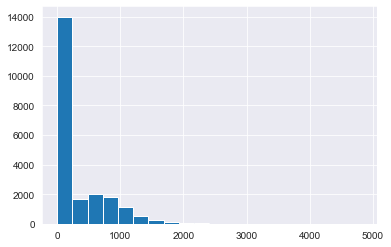

In [103]:
df['sqft_basement'].hist(bins=20)
plt.show()

The histogram clearly shows that the majority of the properties don't have a basement, therefore even after the effort to fix this column it might be better to drop it. However, for the time being I will keep it and will make a decision after cleaning the rest of the dataframe. Maybe an alternative will be to create a new category with a no_basement = 0 and basement = 1, but let's leave it as it is for now

### id

In [104]:
df.id.value_counts()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

It seems according to the .value_counts() that there are some duplicates. Let's dig more into this:

In [106]:
duplicates = df[df.duplicated()]
print(len(duplicates))

0


Ok, so no duplicates according to the previous command lines, so let's explore then the id number, maybe that will work better as clearly there duplicates of those values:

In [107]:
duplicates_id = df[df.duplicated('id')]
print(len(duplicates_id))

177


Lets check out a couple of those ID numbers and see what they are referring to:

In [108]:
df.loc[df.id == 795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sale,year_sale,renovation
17588,795000620,2014-09-24,115000.0,3,1.0,1080,6250,1.0,0.0,2,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250,9,2014,0
17589,795000620,2014-12-15,124000.0,3,1.0,1080,6250,1.0,0.0,2,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250,12,2014,0
17590,795000620,2015-03-11,157000.0,3,1.0,1080,6250,1.0,0.0,2,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250,3,2015,0


In [109]:
df.loc[df.id == 2019200220]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sale,year_sale,renovation
12942,2019200220,2014-09-23,160000.0,3,2.25,1470,8682,1.0,0.0,3,7,1160,310.0,1985,0.0,98003,47.2729,-122.299,1670,8359,9,2014,0
12943,2019200220,2015-02-26,269000.0,3,2.25,1470,8682,1.0,0.0,3,7,1160,310.0,1985,0.0,98003,47.2729,-122.299,1670,8359,2,2015,0


It seems as it is the same house that it has been sold more than once. Because I am dealing with the current market prices, I will preserve the latest price and will drop the others:

In [110]:
df = df.drop_duplicates('id',keep='last')

lets do another check at the value_counts() of the id column and then double check that the ones kept correspond to the most recent ones:

In [111]:
df.id.value_counts()

2911700010    1
5450300010    1
5104511600    1
1160000115    1
686530110     1
             ..
2115510470    1
2922701305    1
6071600370    1
526059224     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [112]:
df.loc[df.id == 795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sale,year_sale,renovation
17590,795000620,2015-03-11,157000.0,3,1.0,1080,6250,1.0,0.0,2,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250,3,2015,0


In [113]:
df.loc[df.id == 2019200220]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sale,year_sale,renovation
12943,2019200220,2015-02-26,269000.0,3,2.25,1470,8682,1.0,0.0,3,7,1160,310.0,1985,0.0,98003,47.2729,-122.299,1670,8359,2,2015,0


Perfect, I have managed to keep the most recent sale price.

For our next step, At this point I'm not sure what other columns need cleaning, so I will do a .describe to look at the statistics of the entire dataframe, and that might give me other clues:

In [114]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sale,year_sale,renovation
count,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000
mean,4.580940e+09,5.418614e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.007703,3.410784,7.662792,1791.170215,285.937021,1971.092997,68.956723,98077.87437,47.560197,-122.213784,1988.384080,12775.718161,6.564006,2014.325257,0.034547
std,2.876761e+09,3.675569e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.087431,0.650035,1.171971,828.692965,440.012962,29.387141,364.552298,53.47748,0.138589,0.140791,685.537057,27345.621867,3.117845,0.468482,0.182634
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000,1.000000,2014.000000,0.000000
25%,2.123537e+09,3.249500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000,4.000000,2014.000000,0.000000
50%,3.904921e+09,4.505500e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000,6.000000,2014.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,4.000000,8.000000,2220.000000,550.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000,9.000000,2015.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000,12.000000,2015.000000,1.000000


According to these numbers, there appears to be a house with 33 bedrooms. It seems odd so lets look in mor edetail at the bedroom column with a value_counts()

### bedrooms

In [115]:
df.bedrooms.value_counts()

3     9731
4     6849
2     2736
5     1586
6      265
1      191
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Only 1 bedroom with 33 bedrooms and the next in terms of size has 11. Lets dig in more into that specific row but also looking at more than 10 bedrooms:

In [116]:
df.loc[df['bedrooms'] >= 10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sale,year_sale,renovation
8748,1773100755,2014-08-21,520000.0,11,3.00,3000,4960,2.0,0.0,3,7,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960,8,2014,1
13301,627300145,2014-08-14,1150000.0,10,5.25,4590,10920,1.0,0.0,3,9,2500,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400,8,2014,0
15147,5566100170,2014-10-29,650000.0,10,2.00,3610,11914,2.0,0.0,4,7,3010,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914,10,2014,0
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700,6,2014,0
19239,8812401450,2014-12-29,660000.0,10,3.00,2920,3745,2.0,0.0,4,7,1860,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745,12,2014,0


So there are 5 properties with 10 or more beedrooms, but the 33 bedroom one is the smallest in terms of sqft_living (1620) and it has only 1.75 bathrooms. If this was real the average size per room would be 49 square feet, which is still possible, but not convincing. However, less than 2 bathrooms for this number of bedrooms doesn't seem real. Therefore I will drop this row (15856)

The additional rows with over 10 bedrooms might be outliers but for the time being lets leave them. It is possible that when I apply the filter of 1,000,000 Dollars they will be filtered out

In [117]:
df.drop(index=15856, inplace=True)

We check again the .value_counts() to see if it is gone:

In [118]:
df.bedrooms.value_counts()

3     9731
4     6849
2     2736
5     1586
6      265
1      191
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

### zipcode

Without doing any of the proper analysis it is clear that the Zipcode will play a role on the price. Before any decisions are made I will need to find out how many zipcodes I'm dealing with:

In [41]:
df.zipcode.value_counts()

98103    599
98038    586
98115    576
98052    571
98117    548
        ... 
98102    104
98010     99
98024     79
98148     56
98039     49
Name: zipcode, Length: 70, dtype: int64

70 zipcodes seems like a lot of variable to work with, specially as zipcode is a categorical. I'll will create 4 sectors hoping that it will properly capture the price distribution, but I will first look at the distribution per zipcode to understand how they are behaving by doing a simple plot:

I will create a new dataframe with the mean value per zipcode and the zipcodes. This way I will be able to sort it for better visuals on the plot

In [119]:
# first I will need a function to calculate the mean price per zipcode:

def zipcode_mean(zipcode):
    
    zipcode_mean = []
    
    for value in zipcode:
        value = df[(df['zipcode'] == value)]
        zipcode_mean.append(value['price'].mean().astype(int))
    return (zipcode_mean)

In [120]:
# Now I will need to define those zipcodes and calculate their mean:

zipcodes = df['zipcode'].unique()

zipcode_mean = list(zipcode_mean(zipcodes))

In [121]:
# With the two previous I can now create my temporary dataframe for the plot purpose:

df_zip = pd.DataFrame([])
df_zip['zip_mean_price'] = zipcode_mean
df_zip['zipcodes'] = zipcodes

# Right away I will sort it based on the zip_mean_price and will display the first 5 rows

sort_zip_mean = df_zip.sort_values(by=['zip_mean_price']).reset_index(drop=True)
sort_zip_mean.head()

,zip_mean_price,zipcodes
0,234606,98002
1,242447,98168
2,253317,98032
3,282268,98001
4,288112,98148


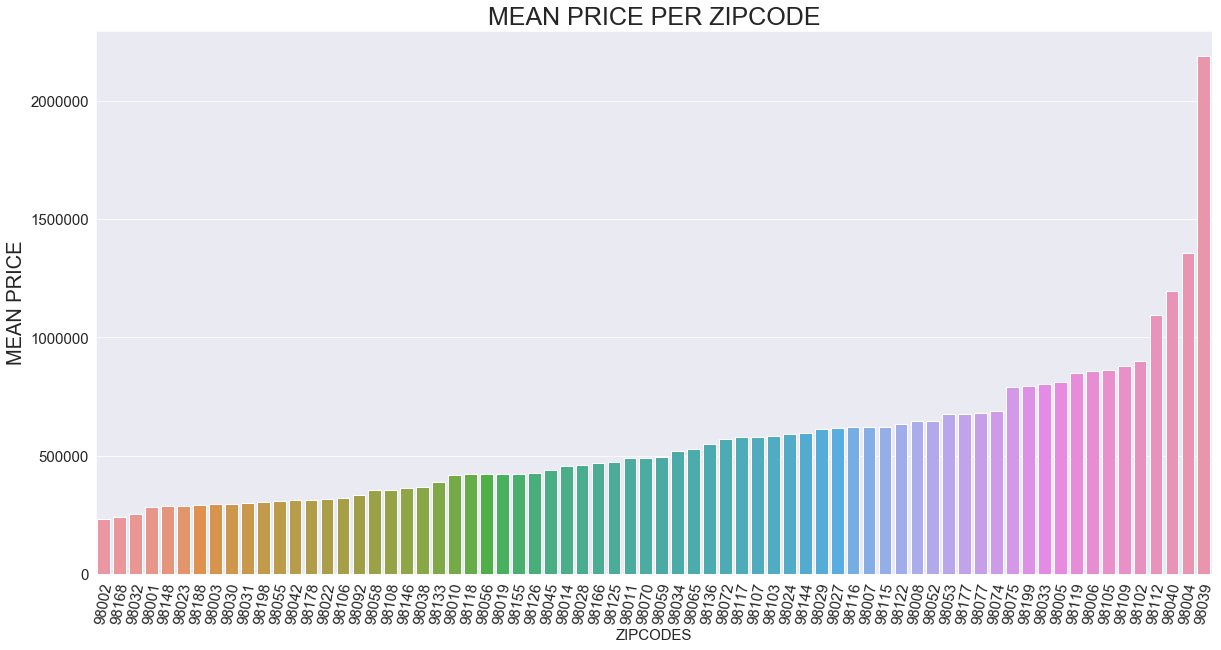

In [45]:
# And finally the bar plot

plt.figure(figsize=(20,10))
sns.barplot(x=sort_zip_mean['zipcodes'], y=sort_zip_mean['zip_mean_price'], order=sort_zip_mean['zipcodes'])
plt.xticks(rotation=80, fontsize=15)
plt.yticks(fontsize=15)
plt.title('MEAN PRICE PER ZIPCODE', fontsize=25)
plt.xlabel('ZIPCODES', fontsize=15)
plt.ylabel('MEAN PRICE',fontsize=20)
plt.show()

The plot illustrates how there are 4 zipcodes with mean price over 1 million $ and with one of those 4 where mean price is over 2 million, so way above what my clients have given me as maximum price per property

Probably the best way to deal with this will be to generate those 4 sections/quadrants. We will keep these zipcode column for the time being but probably it will be drop during the model tests. The sections/quadrants will come from the latitude and longitudes and therefore it might not be necessary to keep the zipcodes, or I might keep them and based on which sector is the most interesting in terms of price and other characteristics, then I can find out which zipcode is the best within that sector/quadrant

To create these sectors I will need to define the boundaries of each sector, so ideally I would like to isolate the properties in the waterfront and with the highest price in one sector if possible, and then the others would be define by this one. To find out those boundaries I need to plot the price value and color code it:

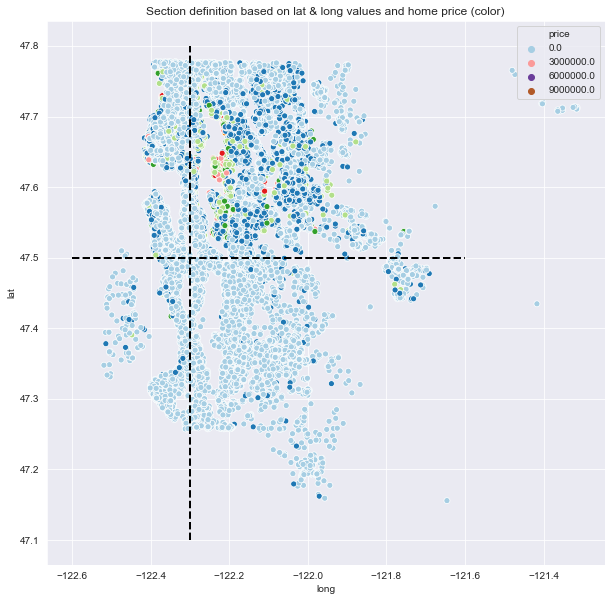

In [122]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='long', y='lat', hue='price', data=df, palette='Paired')
plt.hlines(y=47.5, xmin=-122.6, xmax=-121.6, colors='black', linestyle='--', lw=2)
plt.vlines(x=-122.3, ymin=47.1, ymax=47.8, colors='black', linestyle='--', lw=2)
plt.title('Section definition based on lat & long values and home price (color)')
plt.legend(fancybox=True);

The map above shows the 4 sectors/quadrants that I will be working with. The upper left corresponds to sector_1, then going in clockwise direction, sector_2 (upper_right), sector_3 (lower right), and sector_4 (lower left) respectively. This simple map already illustrated how being in sector_2 (in the waterfront) will increase the house price considerably with respect to the other sectors. I'm expecting from this to have sector_1 as the second most expensive, followed by sector 4 and sector_3 would end up being the cheapest one. 

In [123]:
# This plot is the same as the one above but will need some more cosmetics if I have the time. For the time being, I'll keep the one done by Abhineet

#df.plot(kind="scatter", x="long", y="lat", c="price", cmap=plt.get_cmap("tab20"), colorbar=True, alpha=0.6, figsize=(10,7))
#plt.hlines(y=47.5, xmin=-123.2, xmax=-121.4, colors='black', linestyle='-', lw=2)
#plt.show()


Lets proceed now to create the sections/quadrants:

In [124]:
df.loc[(df['lat'] >= 47.5 ) & (df['long'] < -122.3), "sector_1"] = 1
df.loc[(df['lat'] >= 47.5 ) & (df['long'] > -122.3), "sector_2"] = 1
df.loc[(df['lat'] < 47.5 ) & (df['long'] > -122.3), "sector_3"] = 1
df.loc[(df['lat'] < 47.5 ) & (df['long'] < -122.3), "sector_4"] = 1

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21419 entries, 0 to 21596
Data columns (total 27 columns):
id               21419 non-null int64
date             21419 non-null datetime64[ns]
price            21419 non-null float64
bedrooms         21419 non-null int64
bathrooms        21419 non-null float64
sqft_living      21419 non-null int64
sqft_lot         21419 non-null int64
floors           21419 non-null float64
waterfront       21419 non-null float64
condition        21419 non-null int64
grade            21419 non-null int64
sqft_above       21419 non-null int64
sqft_basement    21419 non-null float64
yr_built         21419 non-null int64
yr_renovated     21419 non-null float64
zipcode          21419 non-null int64
lat              21419 non-null float64
long             21419 non-null float64
sqft_living15    21419 non-null int64
sqft_lot15       21419 non-null int64
month_sale       21419 non-null int64
year_sale        21419 non-null int64
renovation       21419 non-nul

In [126]:
df.isna().sum()

id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated         0
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
month_sale           0
year_sale            0
renovation           0
sector_1         15688
sector_2         12350
sector_3         16512
sector_4         19817
dtype: int64

Because these new columns only have categories of 1 when there is a waterfront property the rest of the rows will end up with a NaN as the .info() shows above. Therefore I will have to replace the, with 0 value now:

In [129]:
df.fillna(0, inplace=True)

In [130]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
month_sale       0
year_sale        0
renovation       0
sector_1         0
sector_2         0
sector_3         0
sector_4         0
dtype: int64

Now just a quick df.head() to QC the new columns:

In [132]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sale,year_sale,renovation,sector_1,sector_2,sector_3,sector_4
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,2014,0,0.0,1.0,0.0,0.0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,2014,1,1.0,0.0,0.0,0.0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2,2015,0,0.0,1.0,0.0,0.0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,2014,0,1.0,0.0,0.0,0.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,2015,0,0.0,1.0,0.0,0.0


### grade 

To avoid working with 11 different home grades, I decided to bin them into 4 categories. The categories were chosen based on the plot below and they consist of the following ranges:

* Grade_A: from 3 to 5
* Grade_B: from 6 to 8
* Grade_C: from 9 to 11
* Grade_D: from 12 to 13

One advantage of doing this now is the reduction of the number of categoricals, as it is clear that this is in principle one

In [133]:
df.grade.value_counts()

7     8888
8     6041
9     2606
6     1995
10    1130
11     396
5      234
12      88
4       27
13      13
3        1
Name: grade, dtype: int64

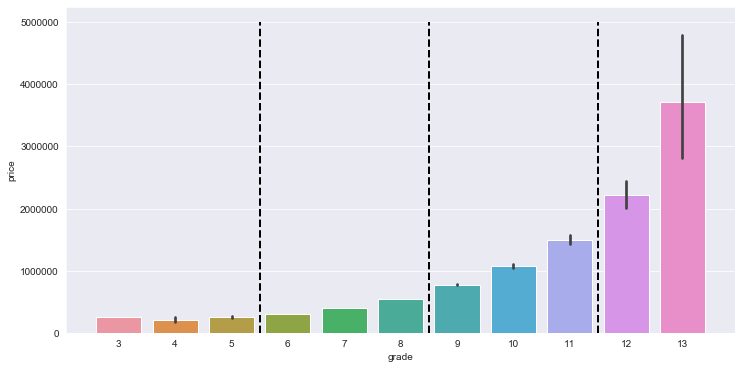

In [134]:
plt.figure(figsize=(12,6))
sns.barplot(x="grade", y="price", data=df)
plt.vlines(x=2.5, ymin=0, ymax=5000000, colors='black', linestyle='--', lw=2)
plt.vlines(x=5.5, ymin=0, ymax=5000000, colors='black', linestyle='--', lw=2)
plt.vlines(x=8.5, ymin=0, ymax=5000000, colors='black', linestyle='--', lw=2)

In plot above the areas created by those dashed lines correspond to the new Grade_A, Grade_B, Grade_C, and Grade_D, from left to right respectively

In [135]:
df.loc[(df['grade'] >=  3) & (df['grade'] < 6), "Grade_A"] = 1
df.loc[(df['grade'] >= 6) & (df['grade'] < 9), "Grade_B"] = 1
df.loc[(df['grade'] >=  9) & (df['grade'] < 12), "Grade_C"] = 1
df.loc[(df['grade'] >= 12 ) & (df['grade'] <= 13), "Grade_D"] = 1

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21419 entries, 0 to 21596
Data columns (total 31 columns):
id               21419 non-null int64
date             21419 non-null datetime64[ns]
price            21419 non-null float64
bedrooms         21419 non-null int64
bathrooms        21419 non-null float64
sqft_living      21419 non-null int64
sqft_lot         21419 non-null int64
floors           21419 non-null float64
waterfront       21419 non-null float64
condition        21419 non-null int64
grade            21419 non-null int64
sqft_above       21419 non-null int64
sqft_basement    21419 non-null float64
yr_built         21419 non-null int64
yr_renovated     21419 non-null float64
zipcode          21419 non-null int64
lat              21419 non-null float64
long             21419 non-null float64
sqft_living15    21419 non-null int64
sqft_lot15       21419 non-null int64
month_sale       21419 non-null int64
year_sale        21419 non-null int64
renovation       21419 non-nul

I will not drop the 'grades' column yet as I want to look at the grades in detail as well once I have put my first cutoff for the prices which will be at 1.1 million dollars and afterwards this will be dropped to 1 million as it was requested by my clients

### yr_built 

One last column that I wanted to add is the age of the properties calculated based on the yr_built and today (2020:)

In [136]:
df_ha = df['yr_built'].apply(lambda x: 2020 - x)
df['home_age'] = df_ha

In [137]:
df.fillna(0, inplace=True)

In [138]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sale,year_sale,renovation,sector_1,sector_2,sector_3,sector_4,Grade_A,Grade_B,Grade_C,Grade_D,home_age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,2014,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,65
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,2014,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,69
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2,2015,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,87
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,2014,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,55
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,2015,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,33


### price 

The price column is our target, so to start understanding it better I will calculate its .mean() and will create a  histogram to see its distribution:

In [139]:
df.price.mean().round(decimals=2)

541856.85

In [140]:
df.price.value_counts()

450000.0    172
350000.0    167
550000.0    157
500000.0    151
425000.0    149
           ... 
234975.0      1
804995.0      1
870515.0      1
336950.0      1
884744.0      1
Name: price, Length: 3595, dtype: int64

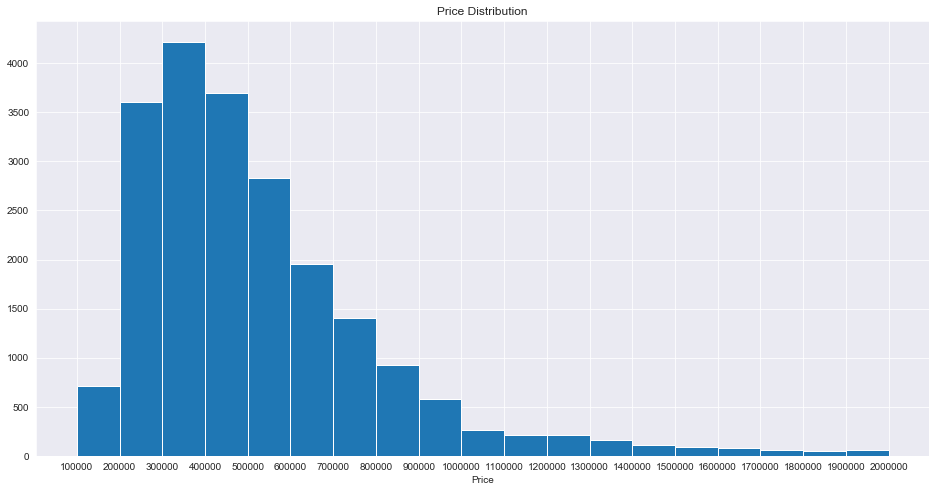

In [63]:
plt.figure(figsize=(16, 8))
bins = np.array([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]) * 1000
plt.hist(x=df['price'], bins=bins)
plt.xticks(bins)
plt.xlabel('Price')
plt.title('Price Distribution')
plt.show()

In [141]:
# Before any decision is made of cropping the data I will need to see what 
# percentage is below 1.1, 1.2, and 1.3 million $

l0 = len(df.loc[df['price'] <= 1000000])/len(df)
l1 = len(df.loc[df['price'] <= 1100000])/len(df)
l2 = len(df.loc[df['price'] <= 1200000])/len(df)
l3 = len(df.loc[df['price'] <= 1300000])/len(df)

print('Percentage of data below 1.1 million $: {}'.format(l0))
print('Percentage of data below 1.1 million $: {}'.format(l1))
print('Percentage of data below 1.2 million $: {}'.format(l2))
print('Percentage of data below 1.3 million $: {}'.format(l3))

Percentage of data below 1.1 million $: 0.9322097203417526
Percentage of data below 1.1 million $: 0.9449554134179934
Percentage of data below 1.2 million $: 0.9546197301461319
Percentage of data below 1.3 million $: 0.9640972967925674


Basically every 100 thousand $ represents 1%, so we are going to be missing 7% of the available properties to respect the threshold value gives by the stakeholders:


In [142]:
df_l0 = df.loc[df['price'] <= 1000000]
df_l1 = df.loc[df['price'] <= 1100000]
df_l2 = df.loc[df['price'] <= 1200000]
df_l3 = df.loc[df['price'] <= 1300000]

print('The number of houses with a threshold of 1.1 million$ is:')
print(len(df_l0), '- leaving out', 21419-len(df_l0))
print('------------------------------------------------------------')
print('The number of houses with a threshold of 1.1 million$ is:')
print(len(df_l1), '- leaving out', 21419-len(df_l1))
print('------------------------------------------------------------')
print('The number of houses with a threshold of 1.2 million$ is:')
print(len(df_l2), '- leaving out', 21419-len(df_l2))
print('------------------------------------------------------------')
print('The number of houses with a threshold of 1.3 million$ is:')
print(len(df_l3), '- leaving out', 21419-len(df_l3))

The number of houses with a threshold of 1.1 million$ is:
19967 - leaving out 1452
------------------------------------------------------------
The number of houses with a threshold of 1.1 million$ is:
20240 - leaving out 1179
------------------------------------------------------------
The number of houses with a threshold of 1.2 million$ is:
20447 - leaving out 972
------------------------------------------------------------
The number of houses with a threshold of 1.3 million$ is:
20650 - leaving out 769


There is quite a difference from my point of view. Every 100 thousand dollars that I include represents around 200 houses give or take 50 more. I will start with the 1.1 million that initially mentioned and then during the next step of the process (Final_Modeling Notebook) I will cut it down to 1 million

So, now I will proceed to save this df as df_cleaned_1 to then use it to analise the categoricals and numerics, create dummies, and transform variables when needed.

Before that I will run a few quick tests for collinearity based on a correlation matrix and a heatmap and I will run a preliminary basemodel.

In [143]:
df_cleaned_1 = df.loc[df['price'] <= 1100000]
print(len(df_cleaned_1))

20240


In [144]:
df_cleaned_1.drop(['date', 'zipcode'], axis=1, inplace=True)

# CHECKING FOR COLLINEARITY

In [145]:
df_cleaned_1.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month_sale,year_sale,renovation,sector_1,sector_2,sector_3,sector_4,Grade_A,Grade_B,Grade_C,Grade_D,home_age
id,1.000000,0.008363,0.010588,0.022030,0.005691,-0.133340,0.028666,-0.008531,-0.025914,0.029570,0.008814,-0.005046,0.024346,-0.013957,0.001903,0.019442,0.010197,-0.143183,-0.010350,0.007544,-0.013961,0.004754,0.025754,-0.047286,0.019330,-0.025267,0.002495,0.005355,-0.002169,-0.024346
price,0.008363,1.000000,0.300063,0.452300,0.618677,0.093582,0.270434,0.044054,0.034606,0.628243,0.527416,0.228628,0.057338,0.081362,0.432423,0.071376,0.560416,0.082204,-0.010479,-0.001962,0.080979,0.083247,0.392985,-0.399826,-0.216224,-0.128094,-0.463061,0.516356,0.038084,-0.057338
bedrooms,0.010588,0.300063,1.000000,0.505143,0.602248,0.025661,0.159999,-0.018135,0.020563,0.329446,0.478785,0.280208,0.166451,0.001058,-0.034435,0.146664,0.384407,0.022853,-0.001405,-0.008274,0.000803,-0.189478,0.137095,0.050871,-0.015100,-0.133306,-0.166517,0.212668,0.015518,-0.166451
bathrooms,0.022030,0.452300,0.505143,1.000000,0.716492,0.064710,0.501773,-0.009472,-0.139960,0.613218,0.637793,0.215440,0.544707,0.022996,-0.011003,0.248697,0.528287,0.064760,0.010167,-0.031195,0.022569,-0.184389,0.183939,0.023908,-0.062690,-0.155485,-0.347152,0.405016,0.040943,-0.544707
sqft_living,0.005691,0.618677,0.602248,0.716492,1.000000,0.159103,0.338984,-0.001967,-0.076173,0.703938,0.853238,0.366731,0.353787,0.018362,0.008320,0.286985,0.737433,0.173210,0.016248,-0.034371,0.018162,-0.247977,0.248099,0.004216,-0.043059,-0.152054,-0.504448,0.565531,0.061336,-0.353787
sqft_lot,-0.133340,0.093582,0.025661,0.064710,0.159103,1.000000,-0.017602,0.018649,-0.002858,0.093478,0.162367,0.011888,0.041871,0.007431,-0.094877,0.222392,0.142776,0.708722,0.002863,-0.000291,0.007530,-0.140272,0.018450,0.116767,0.016034,0.025670,-0.114950,0.110491,0.006239,-0.041871
floors,0.028666,0.270434,0.159999,0.501773,0.338984,-0.017602,1.000000,-0.007669,-0.281205,0.456448,0.527477,-0.293541,0.511911,-0.004372,0.035787,0.135031,0.267348,-0.021803,0.015193,-0.023688,-0.004432,0.027799,0.048269,-0.010218,-0.115749,-0.083823,-0.288677,0.323749,0.009453,-0.511911
waterfront,-0.008531,0.044054,-0.018135,-0.009472,-0.001967,0.018649,-0.007669,1.000000,0.018854,-0.014119,-0.010190,0.015324,-0.033136,0.043081,-0.035304,-0.050131,0.005329,0.023660,0.011399,-0.012117,0.043301,-0.026426,-0.012418,-0.029361,0.114351,0.023035,-0.004571,-0.002385,-0.000926,0.033136
condition,-0.025914,0.034606,0.020563,-0.139960,-0.076173,-0.002858,-0.281205,0.018854,1.000000,-0.174743,-0.181641,0.173987,-0.356477,-0.055112,-0.018858,-0.100538,-0.120637,0.001566,0.024183,-0.047742,-0.054711,0.031851,-0.043155,0.009434,0.008753,0.014370,0.137655,-0.146413,-0.005046,0.356477
grade,0.029570,0.628243,0.329446,0.613218,0.703938,0.093478,0.456448,-0.014119,-0.174743,1.000000,0.709086,0.067737,0.492475,-0.014682,0.083374,0.231259,0.670737,0.103136,0.016124,-0.039723,-0.015031,-0.153538,0.256263,-0.085492,-0.070621,-0.293101,-0.639165,0.748140,0.067968,-0.492475


In [146]:
abs(df_cleaned_1.corr())>.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month_sale,year_sale,renovation,sector_1,sector_2,sector_3,sector_4,Grade_A,Grade_B,Grade_C,Grade_D,home_age
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


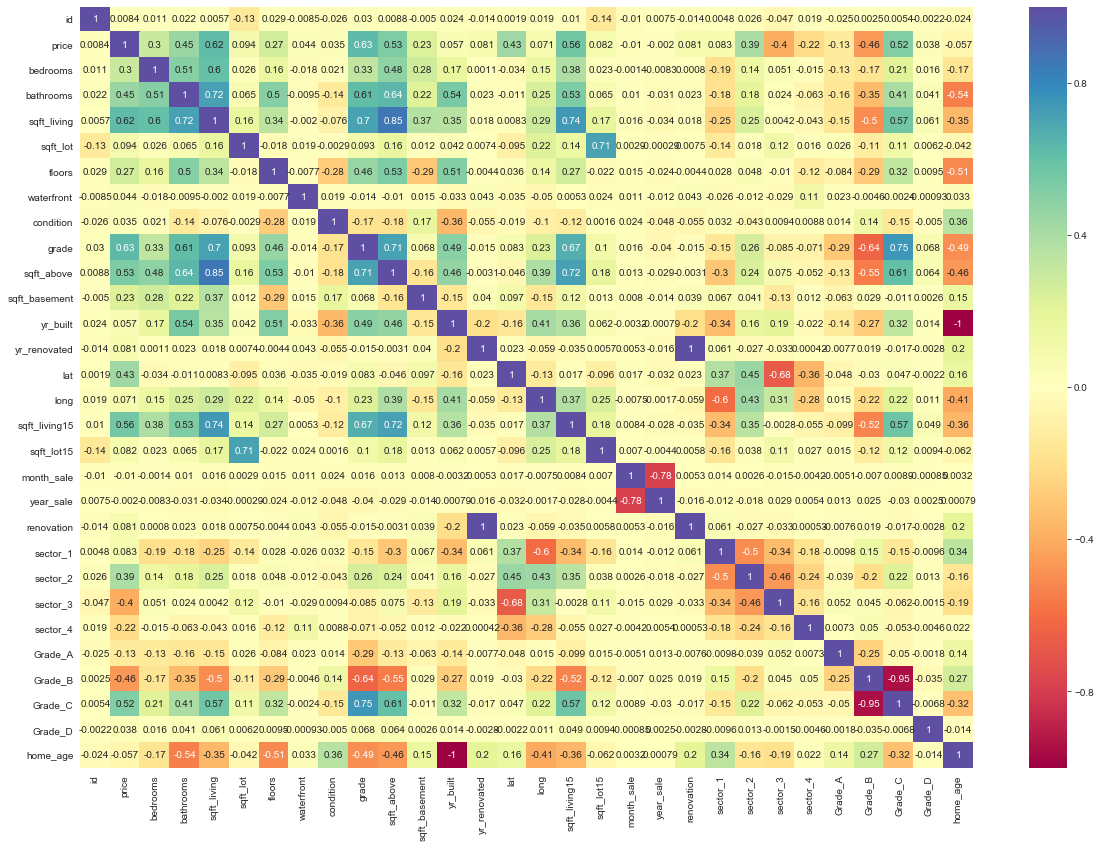

In [147]:
plt.figure(figsize=(20,14))
ax = sns.heatmap(df_cleaned_1.corr(), center=0, cmap='Spectral', annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.show()

Observations from the heatmap above:

Even when the heatmap is from a preliminary baseline model , it already indicates where collinearity can be expected. I will try to reduce this from now so that the next model will be cleaner and with less possible collinearity/multicollinearity.

The columns that I will drop will be the following:

* home_age: this was engineered and therefore it is expected to have a high collinearity with the yr_built. I could keep either one but for the time being I will drop the home_age. If needed it can be reproduce easily later on again

* yr_renovated: I will drop this column as I have engineered a new column to replace it called renovated, which has a 0 for not renovated and a 1 for renovated

* Grade_B: the only reason is the high collinearity with Grade_C. Again because I am keeping grade, it can be brought back easily

* sqft_above: this one has a high collinearity with sqft_living and I believe that sqft_living will be one of the key predictable features for our target (price)

In [71]:
df_cleaned_1.drop(['home_age', 'yr_renovated', 'month_sale', 'Grade_B', 'sqft_above'], axis=1, inplace=True)

==================================================================================================================

<b>Saving the cleaned and ready dataframe into a .csv file</b>:

In [148]:
# I'll proceed to save the dataframe as it is but will name it df_cleaned_1. 
# There will be probably other versions during the process but will always be
# documented and explained on what they have

df_cleaned_1.to_csv('df_cleaned_1.csv')

==================================================================================================================

## FURTHER OBSERVATIONS

Based on the heatmap and its respective correlation coefficients, I can see collinearity within the following (assuming a threshold of > .75):
* sqrt_living and (bathrooms, grade, sqft_above and sqft_living15)
* sqrt_lot and sqrt_lot15
* month_sale and year_sale

Multicollinearity is between three or more variables and the last two that I have listed above are only between 2, so I am not suree if this is a real statement yet

COMMENTS:

I might consider running two models in parallel just to see the impact of the variables causing the multicollinearity. So maybe Model1 with limited number of variables, and Model2 with all variables. I will decide on this as I move forward

# PRELIMINARY BASE MODEL TEST

In [149]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

In [74]:
outcome = 'price'
x_cols = df_cleaned_1.drop(['price', 'id'], axis=1).columns
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors

model = smf.ols(formula=formula, data=df_cleaned_1).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
=======================================================================================
Model:                     OLS                    Adj. R-squared:           0.721      
Dependent Variable:        price                  AIC:                      526975.8434
Date:                      2020-07-27 19:45       BIC:                      527165.8133
No. Observations:          20240                  Log-Likelihood:           -2.6346e+05
Df Model:                  23                     F-statistic:              2275.      
Df Residuals:              20216                  Prob (F-statistic):       0.00       
R-squared:                 0.721                  Scale:                    1.1870e+10 
---------------------------------------------------------------------------------------
                  Coef.        Std.Err.      t     P>|t|      [0.025         0.975]    
---------------------------------------------------------------------------------------
Intercept     -51039260.2544 3495697.0339 -14.6006 0.0000 -57891110.7727 -44187409.7361
bedrooms          -8230.6490    1148.4958  -7.1665 0.0000    -10481.7943     -5979.5037
bathrooms         23892.9149    1889.9370  12.6422 0.0000     20188.4848     27597.3451
sqft_living          76.2495       2.3208  32.8543 0.0000        71.7004        80.7985
sqft_lot              0.2824       0.0272  10.3754 0.0000         0.2290         0.3357
floors            18569.3689    2098.7585   8.8478 0.0000     14455.6316     22683.1062
waterfront       203348.0635   13674.5001  14.8706 0.0000    176544.9310    230151.1959
condition         30572.5016    1315.6770  23.2371 0.0000     27993.6676     33151.3356
grade             64204.4753    1589.1832  40.4009 0.0000     61089.5470     67319.4037
sqft_basement        -3.8016       2.6026  -1.4607 0.1441        -8.9030         1.2997
yr_built          -1486.9106      41.9069 -35.4813 0.0000     -1569.0516     -1404.7696
lat              153168.2958    9861.6450  15.5317 0.0000    133838.6694    172497.9222
long             -36266.6369    8515.2693  -4.2590 0.0000    -52957.2574    -19576.0163
sqft_living15        53.6626       2.0978  25.5802 0.0000        49.5507        57.7745
sqft_lot15           -0.0692       0.0416  -1.6622 0.0965        -0.1508         0.0124
year_sale         20776.2206    1640.7952  12.6623 0.0000     17560.1285     23992.3127
renovation        39684.0737    4680.5733   8.4785 0.0000     30509.7694     48858.3780
sector_1          31985.9393   10518.8043   3.0408 0.0024     11368.2273     52603.6513
sector_2          24008.8406   10574.0502   2.2705 0.0232      3282.8421     44734.8391
sector_3        -112797.6225   10793.7162 -10.4503 0.0000   -133954.1842    -91641.0608
sector_4        -118718.7187   11005.9982 -10.7867 0.0000   -140291.3704    -97146.0669
Grade_A           48683.8724    7461.7979   6.5244 0.0000     34058.1415     63309.6033
Grade_C           21000.6302    3420.5816   6.1395 0.0000     14296.0119     27705.2484
Grade_D         -124308.8429   49206.7564  -2.5263 0.0115   -220758.0879    -27859.5980
---------------------------------------------------------------------------------------
Omnibus:                   1820.403             Durbin-Watson:                1.985    
Prob(Omnibus):             0.000                Jarque-Bera (JB):             3519.869 
Skew:                      0.611                Prob(JB):                     0.000    
Kurtosis:                  4.638                Condition No.:                223712450
=======================================================================================
* The condition number is large (2e+08). This might indicate             strong
multicollinearity or other numerical problems.
"""

The only variable on this preliminary model with a p-value over the threshold (0.05) is the sqft_basement

In [75]:
df_cleaned_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20240 entries, 0 to 21596
Data columns (total 25 columns):
id               20240 non-null int64
price            20240 non-null float64
bedrooms         20240 non-null int64
bathrooms        20240 non-null float64
sqft_living      20240 non-null int64
sqft_lot         20240 non-null int64
floors           20240 non-null float64
waterfront       20240 non-null float64
condition        20240 non-null int64
grade            20240 non-null int64
sqft_basement    20240 non-null float64
yr_built         20240 non-null int64
lat              20240 non-null float64
long             20240 non-null float64
sqft_living15    20240 non-null int64
sqft_lot15       20240 non-null int64
year_sale        20240 non-null int64
renovation       20240 non-null int64
sector_1         20240 non-null float64
sector_2         20240 non-null float64
sector_3         20240 non-null float64
sector_4         20240 non-null float64
Grade_A          20240 non-null f

==================================================================================================================

==================================================================================================================

The next are just tests that I am using to get ideas for how to proceed for the next notebook where I will be focusing more on the modeling, although EDA will always be a part of the work

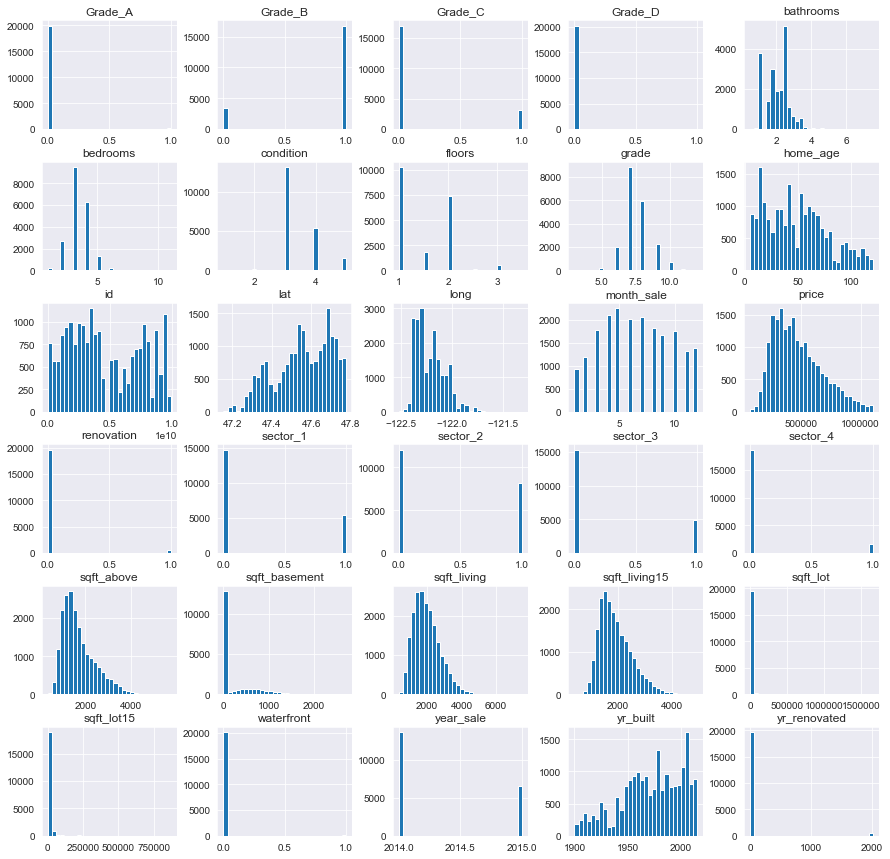

In [150]:
# Histogram of all features 
df_cleaned_1.hist(figsize  = [15, 15],bins=30) 
plt.show()

This model will be recreated in a separate notebook with all the fitting and adjustment explained in detail 

The next plot corresponds to the grades without the binning done but now with the threshold of 1,000,000 Dollars applied

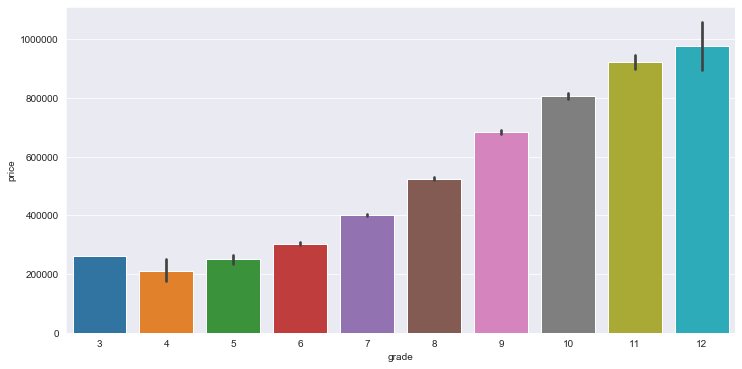

In [151]:
plt.figure(figsize=(12,6))
sns.barplot(x="grade", y="price", data=df_cleaned_1)

It is quite predictable to be honest. The higher the grade the more expensive that you should expect the property to be. It is just interesting that the grade 3 in average is more expensive than grade 4 or 5. I will assume that this is due to number of samples, meaning that you will always have some exception with low graded properties and average price. So even when I wasn't expecting this, it is understandable.